In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights = weights
    self.bias = bias

    pass

  def forward(self, inputs):
    y_pred = self.weights @ inputs + self.bias
    return y_pred
    # <реализовать логику нейрона>


In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
neuron_1 = Neuron(weights, bias)
res = neuron_1.forward(inputs)
res

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
    pass

  def forward(self, inputs):
    #y_pred = torch.mm(inputs.view(1, -1), self.weights) + self.biases
    y_pred = inputs @ self.weights + self.biases
    return y_pred
    # <реализовать логику слоя>

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
linear = Linear(weights, biases)
res = linear.forward(inputs)
res

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
linear = Linear(weights, biases)
res = linear.forward(inputs)
res

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)
    pass

  def forward(self, inputs):
    y_pred = inputs @ self.weights + self.biases
    return y_pred
    # <реализовать логику слоя>

In [ ]:
linear = Linear(inputs.size()[1], 10)
res = linear.forward(inputs)
res

tensor([[ 3.1749, -4.1070, -9.6691, -5.9675, -1.2821,  2.7056,  1.2249,  1.9970,
         -3.6447, -6.8334],
        [ 0.1357, -8.5860, -0.7812, -2.7921, -2.3487, -3.9591,  3.6050,  1.3824,
         -3.1515,  2.9284],
        [ 1.8354, -1.0604, -4.7900,  1.3429, -0.3729,  4.0463, -2.6644,  6.6371,
         -3.9895, -9.5411]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
linear = Linear(inputs.size()[1], 10)
res = linear.forward(inputs)
res

tensor([[ 2.6500, -3.2112,  2.7832,  8.8280,  1.7367,  6.0315,  2.5102,  8.1850,
         -5.0049,  2.3640],
        [-0.8230, -6.5269,  2.7592, 13.4393, -7.2846,  8.7223, -0.0234,  7.7123,
          5.4089,  8.9987],
        [ 1.6469, -8.5963,  1.1676,  3.1147, -2.0571,  4.5551, -2.4509,  9.0943,
         -3.7321, -3.0394]])

In [ ]:
linear = Linear(res.size()[1], 7)
res2 = linear.forward(res)
res2

tensor([[ 15.9642, -13.6953, -12.0553,  17.7373, -15.2645, -23.6649,  -3.3924],
        [-12.2785, -13.3955, -16.0230,  45.0331,   4.6199, -11.9443,  10.9978],
        [  4.0390,  -5.7855,  -8.8736,   6.7156,   6.6784,  -3.8775,  10.2195]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
inputs = torch.randn(4, 3)
inputs

tensor([[ 2.3774,  0.6865,  0.1025],
        [ 0.3304,  0.7629, -0.7630],
        [-0.9299,  0.9810, -0.2276],
        [-0.4788,  0.8248, -1.0171]])

In [ ]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>

    return torch.where(inputs > 0, inputs, 0)


In [ ]:
relu = ReLU()
relu.forward(inputs)

tensor([[2.3774, 0.6865, 0.1025],
        [0.3304, 0.7629, 0.0000],
        [0.0000, 0.9810, 0.0000],
        [0.0000, 0.8248, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
inputs = torch.randn(4, 3)
inputs

tensor([[ 0.8684, -0.3406, -2.2935],
        [-1.1955,  0.5883,  0.6745],
        [-0.4988,  0.5811,  0.9111],
        [ 0.3989,  1.8376,  0.3344]])

In [ ]:
import numpy as np

In [ ]:
np.exp(inputs[0][0])/torch.sum(np.exp(inputs[0]))

tensor(0.7458)

In [ ]:
torch.sum(np.exp(inputs[0]))

tensor(3.1954)

In [ ]:
torch.sum(np.exp(inputs), 1).reshape(4, -1)

tensor([[3.1954],
        [4.0666],
        [4.8822],
        [9.1684]])

In [ ]:
class Softmax:
  def forward(self, inputs):
    # <реализовать логику Softmax>
    return np.exp(inputs)/(torch.sum(np.exp(inputs), 1).reshape(inputs.size()[0], -1))

In [ ]:
softmax = Softmax()
softmax.forward(inputs)

tensor([[0.7458, 0.2226, 0.0316],
        [0.0744, 0.4428, 0.4828],
        [0.1244, 0.3662, 0.5094],
        [0.1625, 0.6851, 0.1524]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
inputs = torch.randn(4, 3)
inputs

tensor([[-0.3827,  0.2354,  0.2527],
        [-0.4738, -0.7288, -0.8742],
        [ 0.9855,  0.4688, -1.4691],
        [ 1.9084, -2.0529,  1.6824]])

In [ ]:
class ELU:
  def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    self.alpha = alpha
    pass

  def forward(self, inputs):
    # <реализовать логику ReLU>
    return torch.where(inputs > 0, inputs, self.alpha * (torch.exp(inputs)-1))

In [ ]:
elu = ELU(0.01)
elu.forward(inputs)

tensor([[-0.0032,  0.2354,  0.2527],
        [-0.0038, -0.0052, -0.0058],
        [ 0.9855,  0.4688, -0.0077],
        [ 1.9084, -0.0087,  1.6824]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return sum(((y_pred - y_true) ** 2)/y_pred.size()[0])
    # <реализовать логику MSE>

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [ ]:
linear = Linear(inputs.size()[1], 1)
res = linear.forward(inputs)
res

tensor([[-1.0681],
        [-2.3008],
        [ 0.8457]])

In [ ]:
((2 - 0.8285) ** 2 + (3 + 0.8132) ** 2 + (4 - 4.8140) ** 2)/3

5.5251674966666675

In [ ]:
loss = MSELoss()
loss.forward(y, res.reshape(1, -1)[0])

tensor(15.8204)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
from torch.nn import CrossEntropyLoss

In [ ]:
loss = CrossEntropyLoss()

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику CCE>
    softmax_pred = torch.softmax(y_pred, dim=1)
    cce = -torch.log(softmax_pred.gather(1, y_true.view(-1, 1)))
    return cce.mean()

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
linear = Linear(inputs.size()[1], 3)
res = linear.forward(inputs)
res

tensor([[ 9.2373, -8.3214,  3.7348],
        [12.7696, -8.9813, -3.9353],
        [ 0.0849, -4.0625,  5.3135]])

In [ ]:
softmax.forward(res)

tensor([[9.9594e-01, 2.3583e-08, 4.0602e-03],
        [1.0000e+00, 3.5785e-10, 5.5609e-08],
        [5.3316e-03, 8.4271e-05, 9.9458e-01]])

In [ ]:
ccl = CategoricalCrossentropyLoss()
ccl.forward(res, y)

tensor(7.5989)

In [ ]:
loss = CrossEntropyLoss()
loss(res, y)

tensor(7.5989)

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MSELossL2:
  def __init__(self, lambda_):
    self.lambda_ = lambda_

  def data_loss(self, y_pred, y_true):
    return torch.sum(torch.pow(y_true - y_pred, 2))

  def reg_loss(self, layer):
    return self.lambda_ * torch.sum(layer, dim=1)

  def forward(self, y_pred, y_true, layer):
    return self.data_loss(y_pred, y_true) + self.reg_loss(layer)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
# <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.tensor(y, dtype=torch.float32)
# <преобразуйте массивы numpy в тензоры torch с типом torch.float32

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression


X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

model = nn.Linear(4, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 500
for epoch in range(num_epochs):
    outputs = model.forward(X)
    loss = criterion(outputs.T, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    test_input = torch.randn(1, 4)
    predicted_output = model(test_input)
    print(f'Predicted output: {predicted_output}')

Epoch [1/500], Loss: 11896.3096
Epoch [2/500], Loss: 11288.1680
Epoch [3/500], Loss: 10711.2598
Epoch [4/500], Loss: 10163.9736
Epoch [5/500], Loss: 9644.7822
Epoch [6/500], Loss: 9152.2373
Epoch [7/500], Loss: 8684.9648
Epoch [8/500], Loss: 8241.6621
Epoch [9/500], Loss: 7821.0933
Epoch [10/500], Loss: 7422.0874
Epoch [11/500], Loss: 7043.5342
Epoch [12/500], Loss: 6684.3813
Epoch [13/500], Loss: 6343.6294
Epoch [14/500], Loss: 6020.3311
Epoch [15/500], Loss: 5713.5879
Epoch [16/500], Loss: 5422.5498
Epoch [17/500], Loss: 5146.4077
Epoch [18/500], Loss: 4884.3955
Epoch [19/500], Loss: 4635.7881
Epoch [20/500], Loss: 4399.8950
Epoch [21/500], Loss: 4176.0645
Epoch [22/500], Loss: 3963.6755
Epoch [23/500], Loss: 3762.1421
Epoch [24/500], Loss: 3570.9053
Epoch [25/500], Loss: 3389.4368
Epoch [26/500], Loss: 3217.2366
Epoch [27/500], Loss: 3053.8284
Epoch [28/500], Loss: 2898.7610
Epoch [29/500], Loss: 2751.6064
Epoch [30/500], Loss: 2611.9595
Epoch [31/500], Loss: 2479.4355
Epoch [32/500

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        # <реализовать логику MSE>
        return (y_pred - y_true) ** 2

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true)# df/dc

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        # <реализовать логику нейрона>
        self.inputs = inputs
        return (inputs * self.weights).sum() + self.bias

    def backward(self, dvalue):
        # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue * self.inputs# df/dW
        self.dinput =  dvalue * self.weights# df/wX
        self.dbias = dvalue# df/db

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = X.shape[-1]# <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred = neuron.forward(x_example)# <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)
        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.weights -= learning_rate * neuron.dweights
        neuron.bias -= learning_rate * neuron.dbias

In [ ]:
losses[::1500]

[tensor([6163.1641]),
 tensor([2.3283e-10]),
 tensor([5.8208e-11]),
 tensor([2.3283e-10]),
 tensor([5.8208e-11]),
 tensor([2.3283e-10]),
 tensor([5.8208e-11])]

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_pred.view(-1, 1) - y_true.view(-1, 1)) ** 2).mean()

    def backward(self, y_pred, y_true):
        self.dinput = -2 *(y_true.view(-1, 1) - y_pred.view(-1, 1)) / y_true.shape[0]

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
#         self.n_inputs = n_inputs
        self.weights = torch.randn(1, n_inputs).T
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias # <реализовать логику нейрона>

    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
        self.dbias = dvalue.sum()# df/db

2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.shape[1]# <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(100):
    # forward pass
    y_pred =  neuron.forward(X)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

In [ ]:
losses[::10]

[tensor(11734.3486),
 tensor(33.4088),
 tensor(0.1422),
 tensor(0.0016),
 tensor(4.3216e-05),
 tensor(1.4242e-06),
 tensor(4.9872e-08),
 tensor(1.6980e-09),
 tensor(2.2712e-10),
 tensor(2.2584e-10)]

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::200]

[tensor(11783.7285),
 tensor(0.5017),
 tensor(0.0002),
 tensor(3.7773e-07),
 tensor(2.8640e-08)]

### 2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.01

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 2.642493963241577
epoch 200 mean loss 0.03027968667447567
epoch 400 mean loss 0.01727745123207569
epoch 600 mean loss 0.01357178296893835
epoch 800 mean loss 0.01138919498771429
epoch 1000 mean loss 0.010001854039728642
epoch 1200 mean loss 0.009117718786001205
epoch 1400 mean loss 0.008562921546399593
epoch 1600 mean loss 0.008166893385350704
epoch 1800 mean loss 0.007887577638030052
epoch 2000 mean loss 0.007700815796852112


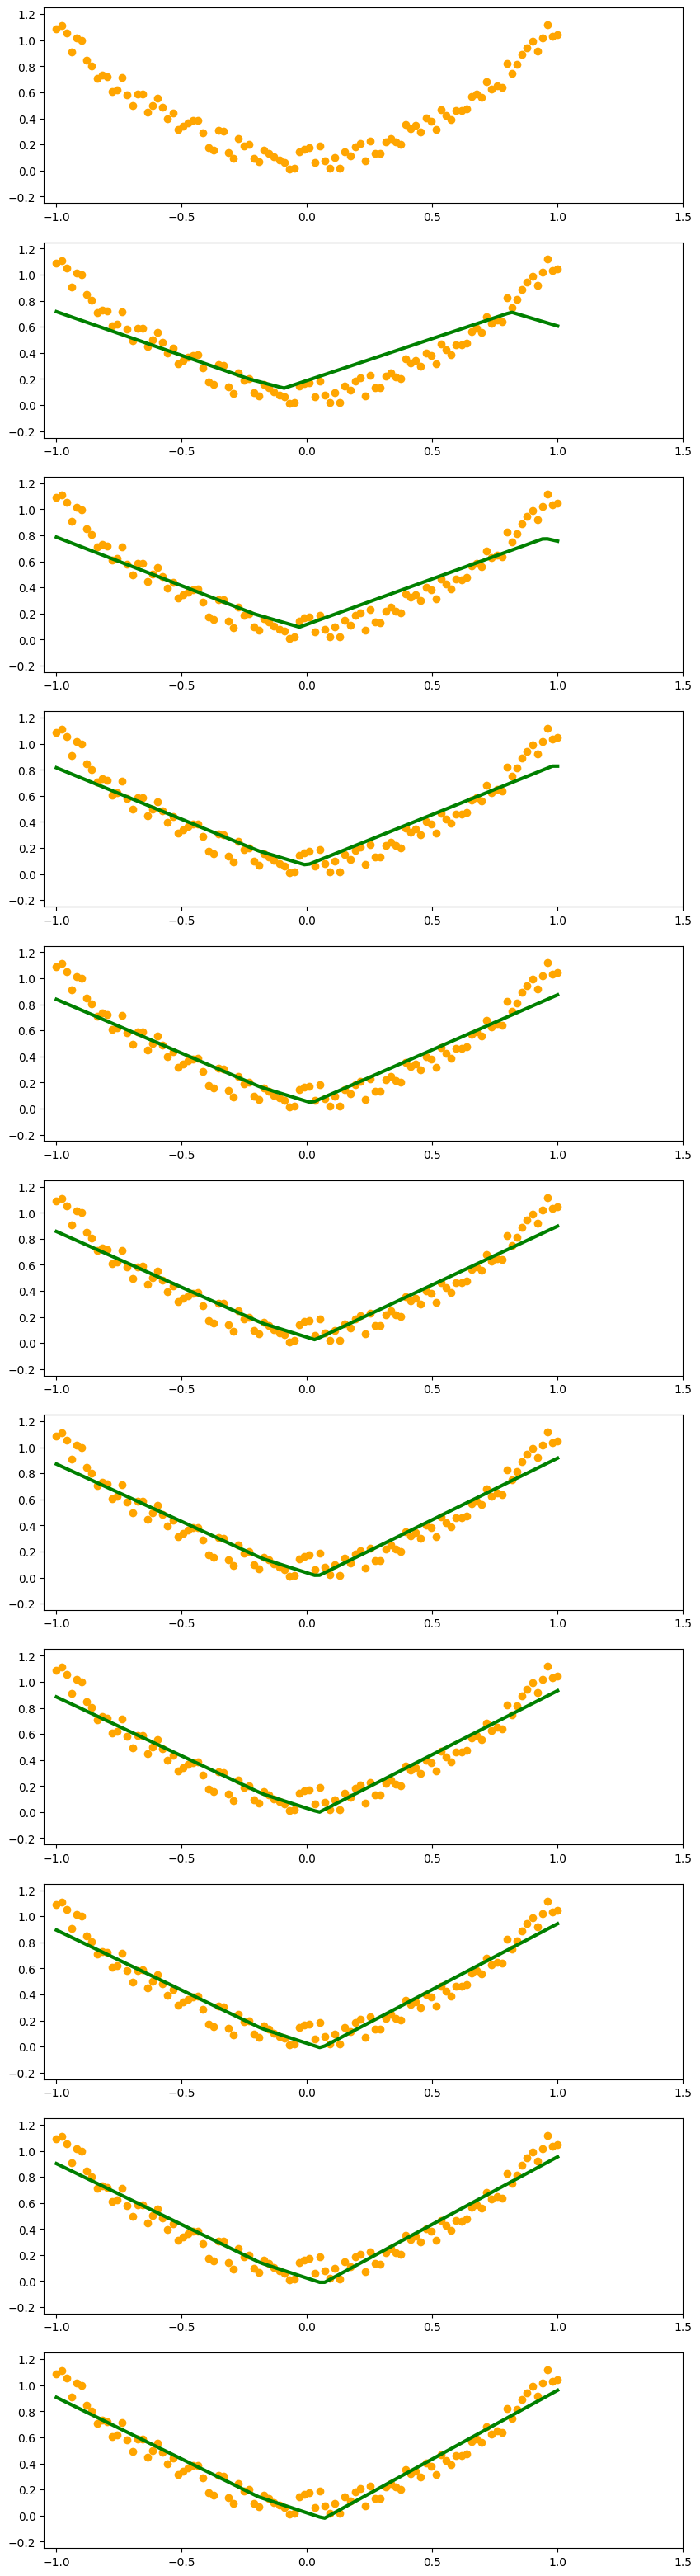

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)